# Projet de Deep Learning (Household Electric Power Consumption)

## Contexte du jeu de données ##

.Le jeu de données initial contient des mesures de consommation électrique d’un foyer enregistrées chaque minute pendant près de 4 ans (de décembre 2006 à novembre 2010).
Il s’agit donc d’un jeu de données massif, comprenant plus de 2 millions d’observations, représentant des grandeurs électriques variées et trois sous-comptages (sub-meterings) pour différentes zones du logement.

##   Réduction du jeu de données ##

.Afin de faciliter la phase de modélisation prédictive et de réduire le coût d’exécution lors de l’application des modèles de machine learning,
nous avons choisi de restreindre notre analyse à un sous-échantillon du jeu de données original.

.Cet échantillon contient 50 000 lignes, correspondant à la période allant du 16 décembre 2006 à 17h24 jusqu’au 20 janvier 2007 à 10h43.
Ce choix permet de conserver la cohérence temporelle et la richesse des signaux tout en rendant le traitement plus rapide et plus efficace.

## Importation du  premier lignes du Data originale ##

In [1]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('household_power.csv')

# Display the first few rows to verify
print(df.head())


C:\Users\new user\AppData\Local\Temp\ipykernel_22632\1463574838.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power.csv')


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [2]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


## Rééchantillonnage du Data origine

In [4]:
import pandas as pd

# 1. Fusionner Date + Time
df['Datetime'] = pd.to_datetime(
    df['Date'] + " " + df['Time'],
    dayfirst=True,
    errors='coerce'
)

# 2. Supprimer NaT
df = df.dropna(subset=['Datetime'])

# 3. Définir index
df = df.set_index('Datetime')

# 4. Séparer colonnes numériques et non-numériques
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# 5. Resampling horaire (uniquement numériques)
df_hourly_numeric = df[numeric_cols].resample('H').mean()

# 6. Garder les colonnes non numériques (par exemple la 1ère valeur de l'heure)
df_hourly_non_numeric = df[non_numeric_cols].resample('H').first()

# 7. Recombiner
df1 = pd.concat([df_hourly_numeric, df_hourly_non_numeric], axis=1)

# 8. Sauvegarde
df1.to_csv(
    r"C:\Users\new user\Downloads\df_hourly.csv",
    index=True,
    encoding='utf-8'
)

print("✅ Rééchantillonnage horaire terminé sans conversion forcée !")


C:\Users\new user\AppData\Local\Temp\ipykernel_22632\67711436.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly_numeric = df[numeric_cols].resample('H').mean()
C:\Users\new user\AppData\Local\Temp\ipykernel_22632\67711436.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly_non_numeric = df[non_numeric_cols].resample('H').first()


✅ Rééchantillonnage horaire terminé sans conversion forcée !


In [5]:
df1

,Sub_metering_3,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
Datetime,,,,,,,,,
2006-12-16 17:00:00,16.861111,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000
2006-12-16 18:00:00,16.866667,16/12/2006,18:00:00,2.790,0.180,237.520,11.800,0.000,0.000
2006-12-16 19:00:00,16.683333,16/12/2006,19:00:00,4.070,0.088,231.990,17.400,0.000,1.000
2006-12-16 20:00:00,16.783333,16/12/2006,20:00:00,3.206,0.078,232.430,13.800,0.000,0.000
2006-12-16 21:00:00,17.216667,16/12/2006,21:00:00,3.314,0.072,236.760,14.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,12.866667,26/11/2010,17:00:00,0.898,0.0,237.22,3.8,0.0,0.0
2010-11-26 18:00:00,0.000000,26/11/2010,18:00:00,1.096,0.142,239.14,4.6,0.0,0.0
2010-11-26 19:00:00,0.000000,26/11/2010,19:00:00,1.81,0.0,235.59,7.6,0.0,0.0


## Indexation des colonnes Date et Time en datetime

In [6]:
import pandas as pd

# Convertir la colonne Date + Time en un seul datetime
df1['Datetime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'], format='%d/%m/%Y %H:%M:%S')

# Définir Datetime comme index temporel
df1 = df1.set_index('Datetime')

# Supprimer les anciennes colonnes si tu n'en as plus besoin
df1 = df1.drop(columns=['Date', 'Time'])

# Trier par date si nécessaire
df1 = df1.sort_index()

print(df1.head())


                     Sub_metering_3 Global_active_power Global_reactive_power  \
Datetime                                                                        
2006-12-16 17:24:00       16.861111               4.216                 0.418   
2006-12-16 18:00:00       16.866667               2.790                 0.180   
2006-12-16 19:00:00       16.683333               4.070                 0.088   
2006-12-16 20:00:00       16.783333               3.206                 0.078   
2006-12-16 21:00:00       17.216667               3.314                 0.072   

                     Voltage Global_intensity Sub_metering_1 Sub_metering_2  
Datetime                                                                     
2006-12-16 17:24:00  234.840           18.400          0.000          1.000  
2006-12-16 18:00:00  237.520           11.800          0.000          0.000  
2006-12-16 19:00:00  231.990           17.400          0.000          1.000  
2006-12-16 20:00:00  232.430           13.

In [7]:
df1

,Sub_metering_3,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
Datetime,,,,,,,
2006-12-16 17:24:00,16.861111,4.216,0.418,234.840,18.400,0.000,1.000
2006-12-16 18:00:00,16.866667,2.790,0.180,237.520,11.800,0.000,0.000
2006-12-16 19:00:00,16.683333,4.070,0.088,231.990,17.400,0.000,1.000
2006-12-16 20:00:00,16.783333,3.206,0.078,232.430,13.800,0.000,0.000
2006-12-16 21:00:00,17.216667,3.314,0.072,236.760,14.000,0.000,0.000
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,12.866667,0.898,0.0,237.22,3.8,0.0,0.0
2010-11-26 18:00:00,0.000000,1.096,0.142,239.14,4.6,0.0,0.0
2010-11-26 19:00:00,0.000000,1.81,0.0,235.59,7.6,0.0,0.0


## Nettoyage et standardisation avancée d’un DataFrame

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings  


# Display the first few rows to understand the structure
print("Original DataFrame Structure:")
print(df1.head())
print("\nColumn Names:", df1.columns.tolist())
print("\nDataFrame Info:")
print(df1.info())

# Basic cleaning steps
def clean_dataframe(df1):
    # 1. Make a copy to avoid modifying the original
    df1_clean = df1.copy()
    
    # 2. Standardize column names (lowercase, replace spaces with underscores)
    df1_clean.columns = [col.strip().lower().replace(' ', '_') for col in df1_clean.columns]
    
    # 3. Check for and handle the Datetime column
    Datetime_cols = [col for col in df1_clean.columns if 'date' in col.lower() or 'time' in col.lower()]
    
    if Datetime_cols:
        # Try to convert the first matching column to Datetime
        try:
            df1_clean[Datetime_cols[0]] = pd.to_datetime(df1_clean[Datetime_cols[0]], errors='coerce')
            # Rename to standard 'Datetime' if it's not already named that
            if Datetime_cols[0] != 'Datetime':
                df1_clean.rename(columns={Datetime_cols[0]: 'Datetime'}, inplace=True)
        except Exception as e:
            print(f"Error converting Datetime column: {e}")
    else:
        print("No Datetime column found. Please check your column names.")
    
    # 4. Convert numeric columns
    numeric_cols = df1_clean.columns.difference(['Datetime'])
    for col in numeric_cols:
        df1_clean[col] = pd.to_numeric(df1_clean[col], errors='coerce')
    
    # 5. Handle missing values
    print(f"\nMissing values before cleaning:\n{df1_clean.isnull().sum()}")
    
    # Fill numeric NaN values with the median of each column
    for col in df1_clean.select_dtypes(include=[np.number]).columns:
        df1_clean[col].fillna(df1_clean[col].median(), inplace=True)
    
    print(f"\nMissing values after cleaning:\n{df1_clean.isnull().sum()}")
    
    # 6. Remove duplicates
    duplicates = df1_clean.duplicated().sum()
    if duplicates > 0:
        print(f"\nRemoving {duplicates} duplicate rows")
        df1_clean.drop_duplicates(inplace=True)
    
    return df1_clean

# Clean the dataframe
df1_clean = clean_dataframe(df1)

warnings.filterwarnings("ignore")


Original DataFrame Structure:
                     Sub_metering_3 Global_active_power Global_reactive_power  \
Datetime                                                                        
2006-12-16 17:24:00       16.861111               4.216                 0.418   
2006-12-16 18:00:00       16.866667               2.790                 0.180   
2006-12-16 19:00:00       16.683333               4.070                 0.088   
2006-12-16 20:00:00       16.783333               3.206                 0.078   
2006-12-16 21:00:00       17.216667               3.314                 0.072   

                     Voltage Global_intensity Sub_metering_1 Sub_metering_2  
Datetime                                                                     
2006-12-16 17:24:00  234.840           18.400          0.000          1.000  
2006-12-16 18:00:00  237.520           11.800          0.000          0.000  
2006-12-16 19:00:00  231.990           17.400          0.000          1.000  
2006-12-16 2

C:\Users\new user\AppData\Local\Temp\ipykernel_22632\2894573761.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1_clean[col].fillna(df1_clean[col].median(), inplace=True)


In [9]:
df1

,Sub_metering_3,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
Datetime,,,,,,,
2006-12-16 17:24:00,16.861111,4.216,0.418,234.840,18.400,0.000,1.000
2006-12-16 18:00:00,16.866667,2.790,0.180,237.520,11.800,0.000,0.000
2006-12-16 19:00:00,16.683333,4.070,0.088,231.990,17.400,0.000,1.000
2006-12-16 20:00:00,16.783333,3.206,0.078,232.430,13.800,0.000,0.000
2006-12-16 21:00:00,17.216667,3.314,0.072,236.760,14.000,0.000,0.000
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,12.866667,0.898,0.0,237.22,3.8,0.0,0.0
2010-11-26 18:00:00,0.000000,1.096,0.142,239.14,4.6,0.0,0.0
2010-11-26 19:00:00,0.000000,1.81,0.0,235.59,7.6,0.0,0.0


## Visualisation de data

In [10]:
print(df1.columns)
print(df1.select_dtypes(include=['number']).columns)
df.dtypes

Index(['Sub_metering_3', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2'],
      dtype='object')
Index(['Sub_metering_3'], dtype='object')


Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

##  Conversion des données en numériques

In [11]:
import pandas as pd

# 1️⃣ Remplacer les virgules par des points (si nécessaire)
df1 = df1.replace(",", ".", regex=True)

# 2️⃣ Convertir toutes les colonnes (sauf Datetime si elle existe)
for col in df1.columns:
    if col != "Datetime":  # on évite de convertir la date
        df1[col] = pd.to_numeric(df1[col], errors="coerce")

# 3️⃣ Afficher les nouveaux types
print(df1.dtypes)

# 4️⃣ Option : supprimer les lignes entièrement vides après conversion
df1 = df1.dropna(how="all")


Sub_metering_3           float64
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
dtype: object


## Histogrammes

Types des colonnes :
Sub_metering_3           float64
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
dtype: object

Colonnes numériques utilisées :
Index(['Sub_metering_3', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2'],
      dtype='object')


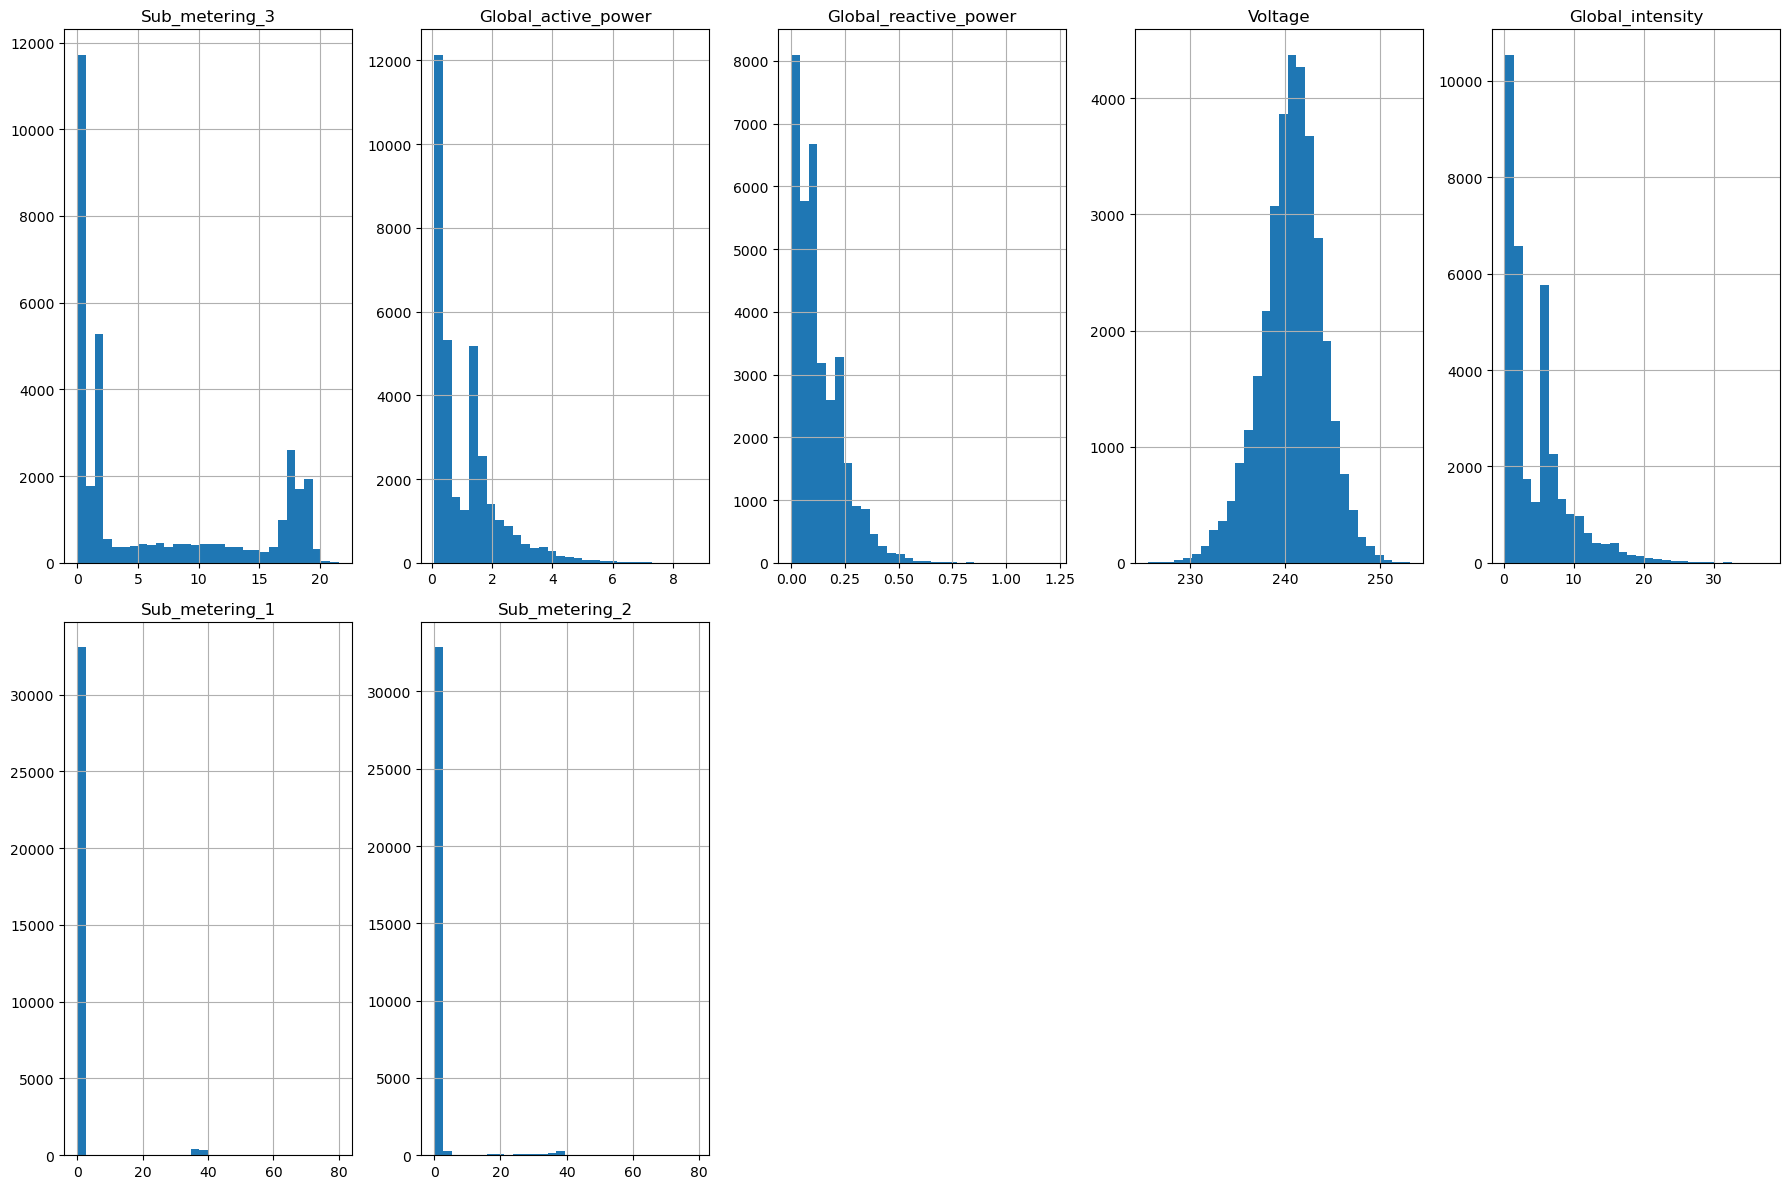

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Afficher les types de données (debug)
print("Types des colonnes :")
print(df1.dtypes)

# 2️⃣ Garder uniquement les colonnes numériques
df1_numeric = df1.select_dtypes(include=['int64', 'float64'])

print("\nColonnes numériques utilisées :")
print(df1_numeric.columns)

# 3️⃣ Nombre de colonnes numériques
num_columns = len(df1_numeric.columns)

# 4️⃣ Configuration de la grille (5 graphiques par ligne)
cols = 5
rows = (num_columns // cols) + (1 if num_columns % cols != 0 else 0)

# 5️⃣ Tracer les histogrammes
df1_numeric.hist(figsize=(18, 12), bins=30, layout=(rows, cols))

plt.tight_layout()
plt.show()


## Detection des outliers et le supprimer 

In [13]:
import pandas as pd

# Sélectionner uniquement les colonnes numériques
df_num = df1.select_dtypes(include=['float64', 'int64'])

# Calcul IQR et filtrage
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Détection des outliers
outliers = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))
print("Nombre d'outliers par colonne :")
print(outliers.sum())

# Suppression des outliers
df_clean = df1[~outliers.any(axis=1)]

print("\nTaille originale :", df1.shape)
print("Taille après suppression :", df_clean.shape)


Nombre d'outliers par colonne :
Sub_metering_3              0
Global_active_power      1584
Global_reactive_power     676
Voltage                   832
Global_intensity         1703
Sub_metering_1           2824
Sub_metering_2           1299
dtype: int64

Taille originale : (34168, 7)
Taille après suppression : (28981, 7)


In [14]:
df1

,Sub_metering_3,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
Datetime,,,,,,,
2006-12-16 17:24:00,16.861111,4.216,0.418,234.84,18.4,0.0,1.0
2006-12-16 18:00:00,16.866667,2.790,0.180,237.52,11.8,0.0,0.0
2006-12-16 19:00:00,16.683333,4.070,0.088,231.99,17.4,0.0,1.0
2006-12-16 20:00:00,16.783333,3.206,0.078,232.43,13.8,0.0,0.0
2006-12-16 21:00:00,17.216667,3.314,0.072,236.76,14.0,0.0,0.0
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,12.866667,0.898,0.000,237.22,3.8,0.0,0.0
2010-11-26 18:00:00,0.000000,1.096,0.142,239.14,4.6,0.0,0.0
2010-11-26 19:00:00,0.000000,1.810,0.000,235.59,7.6,0.0,0.0


## Correlation du dataframe pour savoir le meilleur Target 

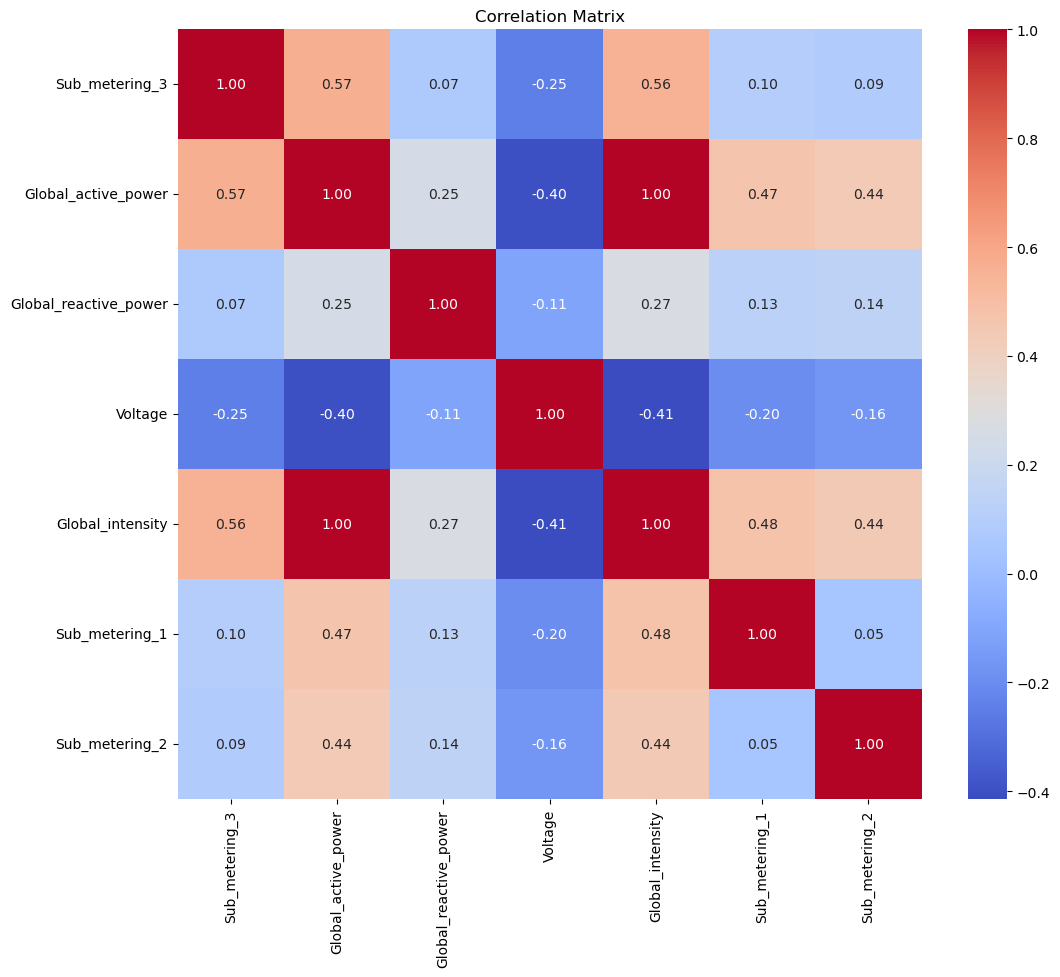

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la matrice de corrélation sur toutes les colonnes numériques
corr = df1.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


##  Validation, conversion numérique et nettoyage des données temporelles

In [16]:
# Vérifier que la colonne 'Datetime' existe avant de la mettre en index
if 'Datetime' in df1.columns:
    df1['Datetime'] = pd.to_datetime(df1['Datetime'], errors='coerce')
    df1.set_index('Datetime', inplace=True)
elif not isinstance(df1.index, pd.DatetimeIndex):
    raise KeyError("La colonne 'Datetime' est absente et l'index n'est pas de type datetime.")

# Liste des colonnes numériques à convertir
cols_to_numeric = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

# Vérifier que les colonnes existent avant la conversion
existing_cols = [col for col in cols_to_numeric if col in df1.columns]
if not existing_cols:
    raise KeyError("Aucune des colonnes numériques spécifiées n'existe dans le DataFrame.")

# Conversion des colonnes en valeurs numériques
df1[existing_cols] = df1[existing_cols].apply(pd.to_numeric, errors='coerce')

# Afficher les valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df1[existing_cols].isnull().sum())

# Supprimer les lignes contenant des valeurs manquantes
df1.dropna(subset=existing_cols, inplace=True)

# Afficher la taille finale du DataFrame
print(f"Forme finale après nettoyage : {df1.shape}")


Valeurs manquantes par colonne :
Global_active_power      15
Global_reactive_power    15
Voltage                  15
Global_intensity         15
Sub_metering_1           15
Sub_metering_2           15
Sub_metering_3            0
dtype: int64
Forme finale après nettoyage : (34153, 7)


## Remet l'index Datetime comme un colomne normale

In [17]:
import pandas as pd

# Si 'Datetime' est dans l'index, on le remet comme colonne normale
if df1.index.name == 'Datetime':
    df1.reset_index(inplace=True)

# Nettoyer les noms de colonnes (supprimer les espaces cachés)
df1.columns = df1.columns.str.strip()

# S'assurer que 'Datetime' est bien en type datetime
df1['Datetime'] = pd.to_datetime(df1['Datetime'], errors='coerce')

# Vérifier le résultat
print(df1.info())
print(df1.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34153 entries, 0 to 34152
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Datetime               34153 non-null  datetime64[ns]
 1   Sub_metering_3         34153 non-null  float64       
 2   Global_active_power    34153 non-null  float64       
 3   Global_reactive_power  34153 non-null  float64       
 4   Voltage                34153 non-null  float64       
 5   Global_intensity       34153 non-null  float64       
 6   Sub_metering_1         34153 non-null  float64       
 7   Sub_metering_2         34153 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.1 MB
None
             Datetime  Sub_metering_3  Global_active_power  \
0 2006-12-16 17:24:00       16.861111                4.216   
1 2006-12-16 18:00:00       16.866667                2.790   
2 2006-12-16 19:00:00       16.683333               

In [18]:
df1.columns

Index(['Datetime', 'Sub_metering_3', 'Global_active_power',
       'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2'],
      dtype='object')

In [19]:
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df1.set_index('Datetime', inplace=True)
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## Préparation des données ##

Avant tout, on prépare les données pour qu’elles soient prêtes pour les modèles de séries temporelles :

In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Conv1D, MaxPooling1D, Flatten, Bidirectional
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# ======================================
#  Correction de la colonne 'Datetime'
# ======================================

# Si 'Datetime' n'est pas dans les colonnes mais dans l'index, on le récupère
if 'Datetime' not in df1.columns:
    df1 = df1.reset_index()

# Supprimer les espaces et nettoyer
df1.columns = df1.columns.str.strip()

# Conversion du type datetime
df1['Datetime'] = pd.to_datetime(df1['Datetime'], errors='coerce')

# Suppression des lignes invalides
df1.dropna(subset=['Datetime'], inplace=True)

# Définir comme index temporel
df1.set_index('Datetime', inplace=True)

# ======================================
#  Variable cible à prédire
# ======================================
target_col = 'Global_active_power'

if target_col not in df1.columns:
    raise KeyError(f"La colonne {target_col} n'existe pas dans df1. Colonnes trouvées : {df1.columns.tolist()}")

series = df1[target_col].values

# ======================================
#  Normalisation pour les modèles neuronaux
# ======================================
scaler = MinMaxScaler()
scaled = scaler.fit_transform(series.reshape(-1, 1))

# Split train / test
train_size = int(len(scaled) * 0.8)
train, test = scaled[:train_size], scaled[train_size:]

# ======================================
#  Création des séquences temporelles
# ======================================
def create_dataset(dataset, n_steps=1):
    X, y = [], []
    for i in range(len(dataset) - n_steps):
        X.append(dataset[i:(i + n_steps), 0])
        y.append(dataset[i + n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 10
X_train, y_train = create_dataset(train, n_steps)
X_test, y_test = create_dataset(test, n_steps)

# Reshape pour les modèles séquentiels
X_train_seq = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_seq = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Données prêtes pour la prediction")
print(f"Train shape : {X_train_seq.shape}, Test shape : {X_test_seq.shape}")
print(f"Index : {df1.index.name}")
print(f"Colonnes : {df1.columns.tolist()[:5]}")


Données prêtes pour la prediction
Train shape : (27312, 10, 1), Test shape : (6821, 10, 1)
Index : Datetime
Colonnes : ['Sub_metering_3', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']


## 1. Modèle de persistance (Median Forecasting)
Le modèle prédit toujours la médiane des valeurs passées

RMSE - Persistence Median: 0.9866627367576738


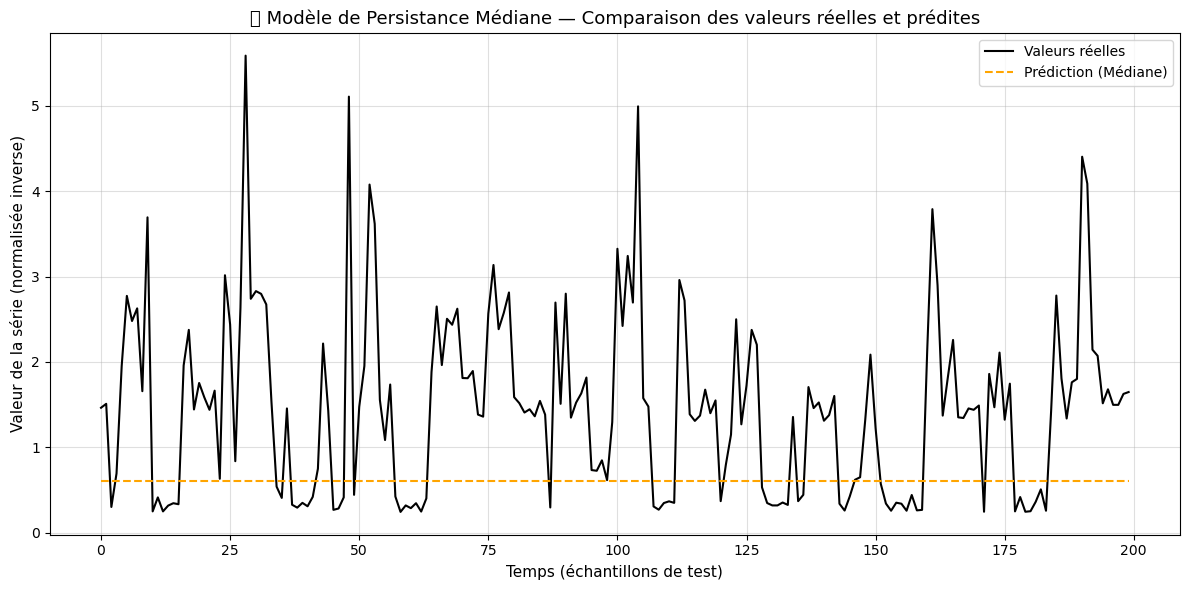

In [21]:
median_value = np.median(train)
y_pred_median = np.full_like(y_test, median_value)
rmse_median = sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)),
                                      scaler.inverse_transform(y_pred_median.reshape(-1, 1))))
print("RMSE - Persistence Median:", rmse_median)
plt.figure(figsize=(12, 6))

# Valeurs réelles
plt.plot(
    scaler.inverse_transform(y_test.reshape(-1, 1))[:200],
    label='Valeurs réelles',
    color='black'
)

# Valeurs prédites par Persistence Median
plt.plot(
    scaler.inverse_transform(y_pred_median.reshape(-1, 1))[:200],
    label='Prédiction (Médiane)',
    color='orange',
    linestyle='--'
)

# Titre et légende
plt.title("📈 Modèle de Persistance Médiane — Comparaison des valeurs réelles et prédites", fontsize=13)
plt.xlabel("Temps (échantillons de test)", fontsize=11)
plt.ylabel("Valeur de la série (normalisée inverse)", fontsize=11)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

## 2. Modèle SARIMA

RMSE - SARIMA: 1.8742195088378488


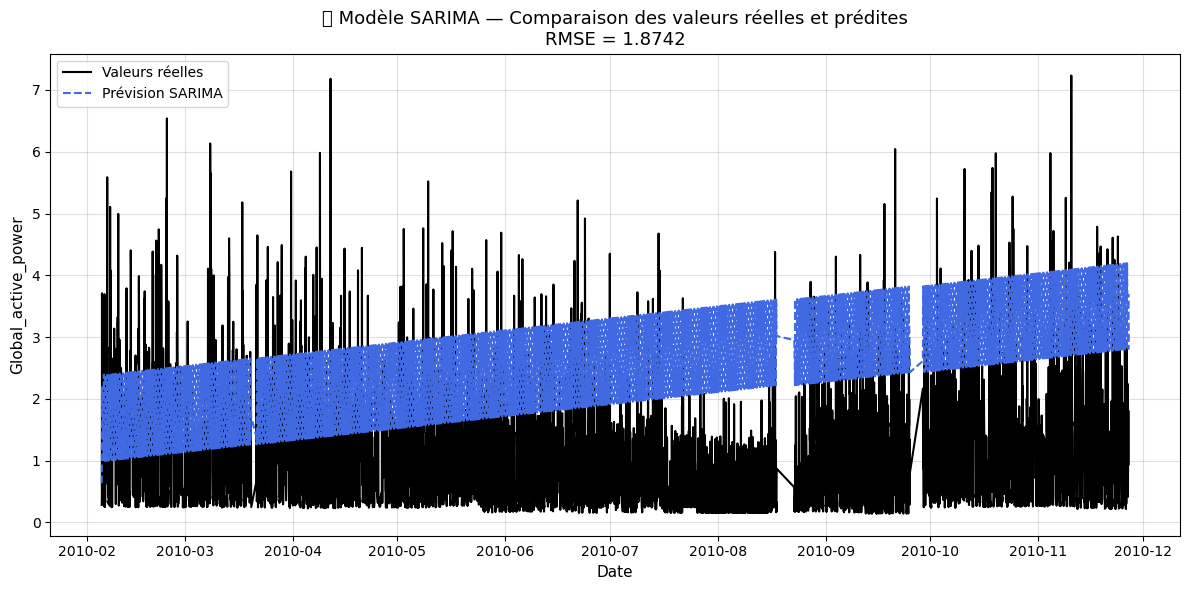

In [22]:
sarima_model = SARIMAX(df1[target_col][:train_size], order=(2,1,2), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(len(df1[target_col][train_size:]))

rmse_sarima = sqrt(mean_squared_error(df1[target_col][train_size:], sarima_forecast))
print("RMSE - SARIMA:", rmse_sarima)
plt.figure(figsize=(12, 6))

# Courbe des valeurs réelles (test)
plt.plot(
    df1.index[train_size:],
    df1[target_col][train_size:],
    label='Valeurs réelles',
    color='black'
)

# Courbe des prédictions SARIMA
plt.plot(
    df1.index[train_size:],
    sarima_forecast,
    label='Prévision SARIMA',
    color='royalblue',
    linestyle='--'
)

# Titre et légende
plt.title(f"📈 Modèle SARIMA — Comparaison des valeurs réelles et prédites\nRMSE = {rmse_sarima:.4f}", fontsize=13)
plt.xlabel("Date", fontsize=11)
plt.ylabel(target_col, fontsize=11)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

## 3. RNN simple

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE - RNN: 0.8002826660749991


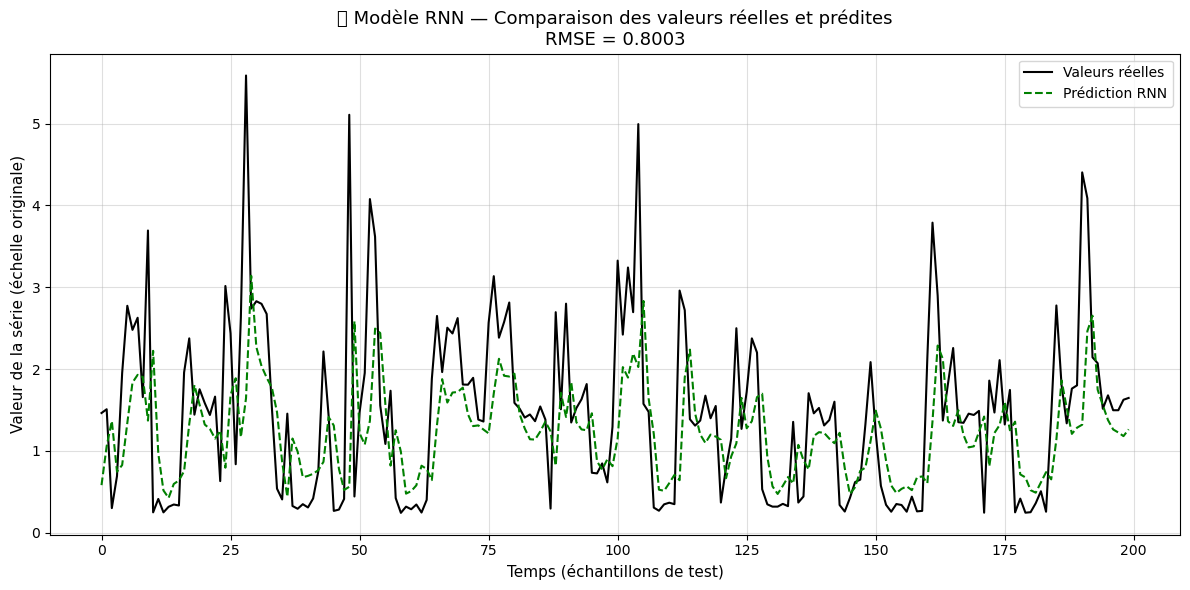

In [23]:
rnn = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(n_steps, 1)),
    Dense(1)
])
rnn.compile(optimizer='adam', loss='mse')
rnn.fit(X_train_seq, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_rnn = rnn.predict(X_test_seq)
rmse_rnn = sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),
                                   scaler.inverse_transform(y_pred_rnn)))
print("RMSE - RNN:", rmse_rnn)
plt.figure(figsize=(12, 6))

# Courbe des valeurs réelles
plt.plot(
    scaler.inverse_transform(y_test.reshape(-1, 1))[:200],
    label='Valeurs réelles',
    color='black'
)

# Courbe des prédictions RNN
plt.plot(
    scaler.inverse_transform(y_pred_rnn)[:200],
    label='Prédiction RNN',
    color='green',
    linestyle='--'
)

# Titre et légende
plt.title(f"📈 Modèle RNN — Comparaison des valeurs réelles et prédites\nRMSE = {rmse_rnn:.4f}", fontsize=13)
plt.xlabel("Temps (échantillons de test)", fontsize=11)
plt.ylabel("Valeur de la série (échelle originale)", fontsize=11)
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

## 4. LSTM Vanilla

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RMSE - LSTM (Vanilla): 0.7911632135740502


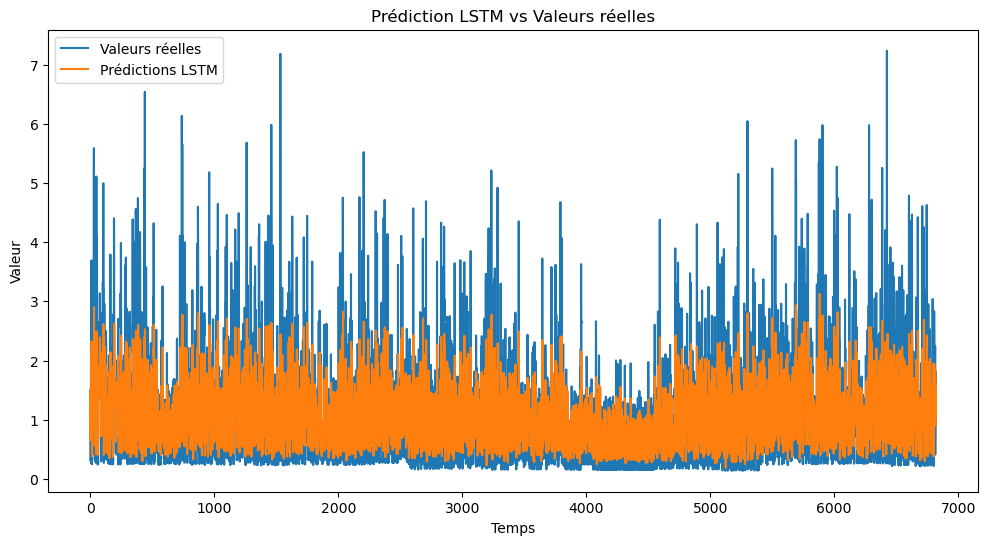

In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Définition et entraînement du LSTM
lstm = Sequential([
    LSTM(50, activation='tanh', input_shape=(n_steps, 1)),
    Dense(1)
])
lstm.compile(optimizer='adam', loss='mse')
lstm.fit(X_train_seq, y_train, epochs=10, batch_size=32, verbose=0)

# Prédiction
y_pred_lstm = lstm.predict(X_test_seq)

# Inverse transform pour revenir aux valeurs réelles
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = scaler.inverse_transform(y_pred_lstm)

# Calcul du RMSE
rmse_lstm = sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("RMSE - LSTM (Vanilla):", rmse_lstm)

# Visualisation
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Valeurs réelles')
plt.plot(y_pred_inv, label='Prédictions LSTM')
plt.title('Prédiction LSTM vs Valeurs réelles')
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.legend()
plt.show()


## 5. LSTM empilé (Stacked)

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
RMSE - LSTM Stacked: 0.7886549721198104


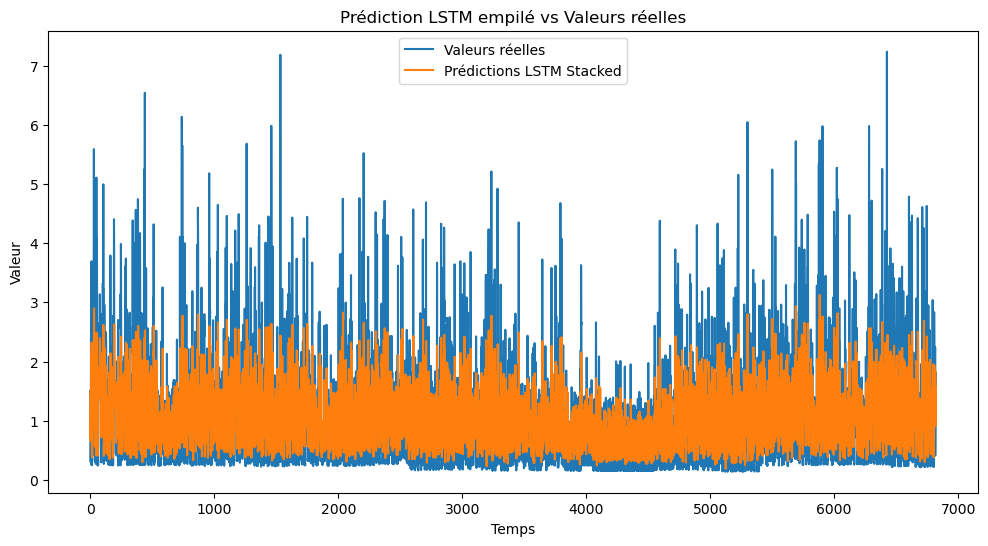

In [25]:
lstm_stacked = Sequential([
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(n_steps, 1)),
    LSTM(30, activation='tanh'),
    Dense(1)
])
lstm_stacked.compile(optimizer='adam', loss='mse')
lstm_stacked.fit(X_train_seq, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_stacked = lstm_stacked.predict(X_test_seq)
rmse_stacked = sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),
                                       scaler.inverse_transform(y_pred_stacked)))
print("RMSE - LSTM Stacked:", rmse_stacked)
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Valeurs réelles')
plt.plot(y_pred_inv, label='Prédictions LSTM Stacked')
plt.title('Prédiction LSTM empilé vs Valeurs réelles')
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.legend()
plt.show()

## 6. LSTM Bidirectionnel

214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
RMSE - Bidirectional LSTM: 0.7873431226939464


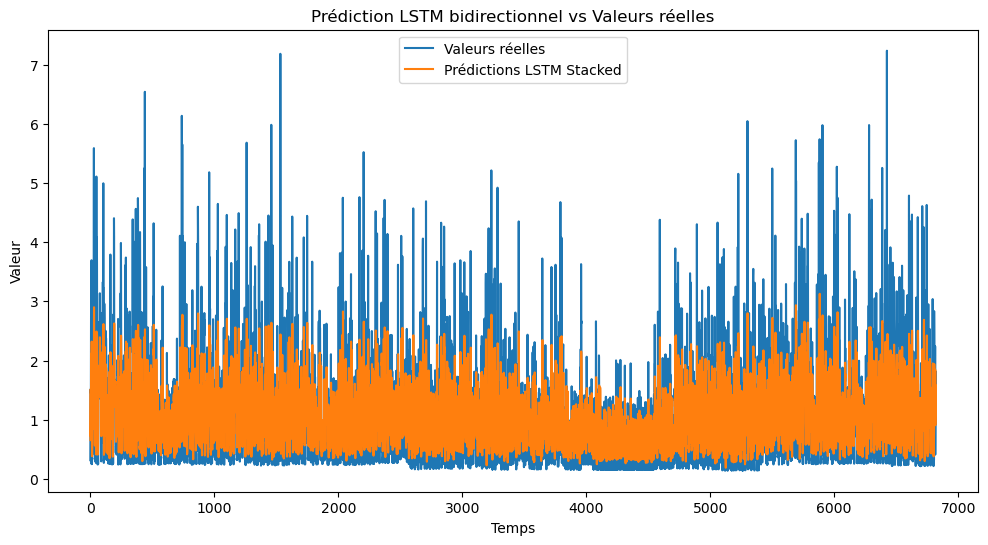

In [26]:
bilstm = Sequential([
    Bidirectional(LSTM(50, activation='tanh'), input_shape=(n_steps, 1)),
    Dense(1)
])
bilstm.compile(optimizer='adam', loss='mse')
bilstm.fit(X_train_seq, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_bilstm = bilstm.predict(X_test_seq)
rmse_bilstm = sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),
                                      scaler.inverse_transform(y_pred_bilstm)))
print("RMSE - Bidirectional LSTM:", rmse_bilstm)
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Valeurs réelles')
plt.plot(y_pred_inv, label='Prédictions LSTM Stacked')
plt.title('Prédiction LSTM bidirectionnel vs Valeurs réelles')
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.legend()
plt.show()

## 7. MLP (Multi-Layer Perceptron)

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE - MLP: 0.811956380390253


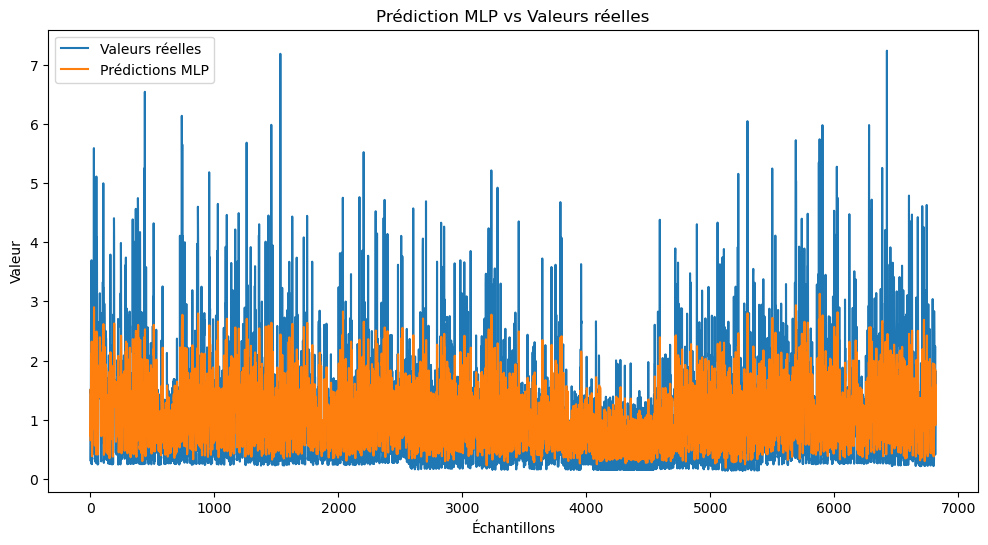

In [27]:
mlp = Sequential([
    Dense(100, activation='relu', input_dim=n_steps),
    Dense(50, activation='relu'),
    Dense(1)
])
mlp.compile(optimizer='adam', loss='mse')
mlp.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_mlp = mlp.predict(X_test)
rmse_mlp = sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),
                                   scaler.inverse_transform(y_pred_mlp)))
print("RMSE - MLP:", rmse_mlp)
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Valeurs réelles')
plt.plot(y_pred_inv, label='Prédictions MLP')
plt.title('Prédiction MLP vs Valeurs réelles')
plt.xlabel('Échantillons')
plt.ylabel('Valeur')
plt.legend()
plt.show()

## 8. CNN

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE - CNN: 0.8638317921003482


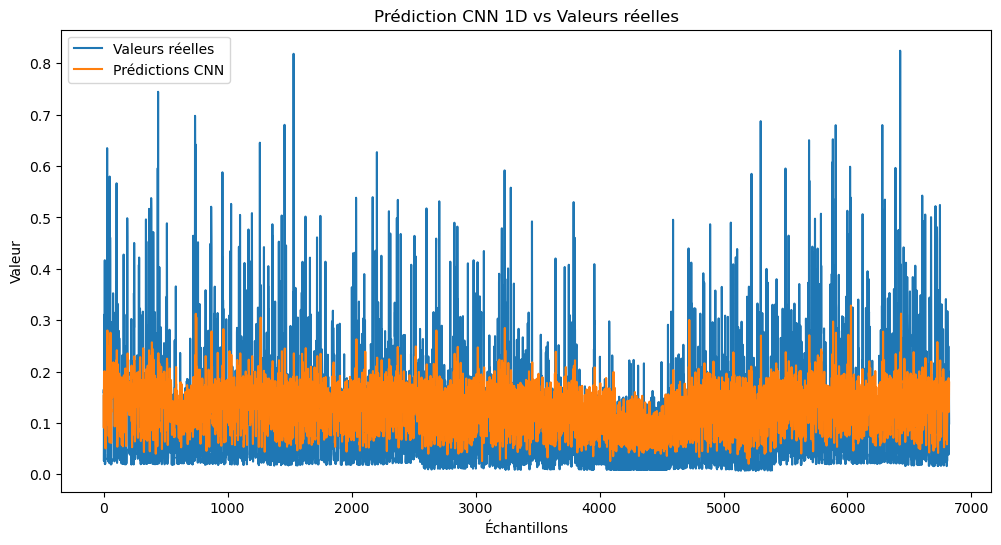

In [28]:
cnn = Sequential([
    Conv1D(64, 2, activation='relu', input_shape=(n_steps, 1)),
    MaxPooling1D(),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
cnn.compile(optimizer='adam', loss='mse')
cnn.fit(X_train_seq, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_cnn = cnn.predict(X_test_seq)
rmse_cnn = sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),
                                   scaler.inverse_transform(y_pred_cnn)))
print("RMSE - CNN:", rmse_cnn)
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Valeurs réelles')
plt.plot(y_pred_cnn, label='Prédictions CNN')
plt.title('Prédiction CNN 1D vs Valeurs réelles')
plt.xlabel('Échantillons')
plt.ylabel('Valeur')
plt.legend()
plt.show()

## K-Means  ##

=== KMEANS ===
Silhouette : 0.7189658568257941
Davies-Bouldin : 0.5634321172649639
Calinski-Harabasz : 14874.286307583598
Cluster inertia (sum of squared distances) ~ RMSE : 9.158339213178342


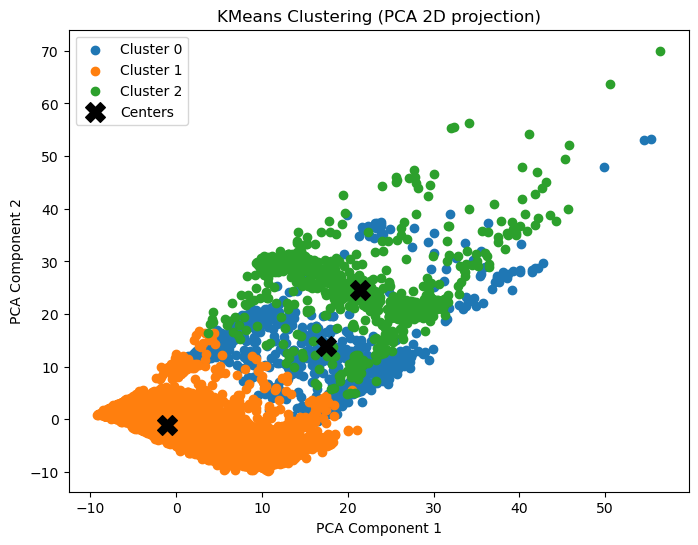

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import numpy as np

# --- 1. Prepare data ---
X_cluster = df1.drop(columns=["Global_active_power"])

# --- 2. Fit KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X_cluster)

# --- 3. Clustering metrics ---
sil_score = silhouette_score(X_cluster, labels_km)
db_score = davies_bouldin_score(X_cluster, labels_km)
ch_score = calinski_harabasz_score(X_cluster, labels_km)
inertia = kmeans.inertia_  # similar to RMSE concept

print("=== KMEANS ===")
print("Silhouette :", sil_score)
print("Davies-Bouldin :", db_score)
print("Calinski-Harabasz :", ch_score)
print("Cluster inertia (sum of squared distances) ~ RMSE :", np.sqrt(inertia / len(X_cluster)))

# --- 4. Optional: 2D visualization with PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(8,6))
for label in np.unique(labels_km):
    plt.scatter(X_pca[labels_km==label, 0],
                X_pca[labels_km==label, 1],
                label=f'Cluster {label}')
    
# Plot cluster centers in PCA space
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:,0], centers_pca[:,1], c='black', marker='X', s=200, label='Centers')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering (PCA 2D projection)")
plt.legend()
plt.show()
rmse_kmeans = np.sqrt(kmeans.inertia_ / len(X_cluster))


## DBSCAN #

=== DBSCAN ===
Clusters (including -1 for noise) : {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int

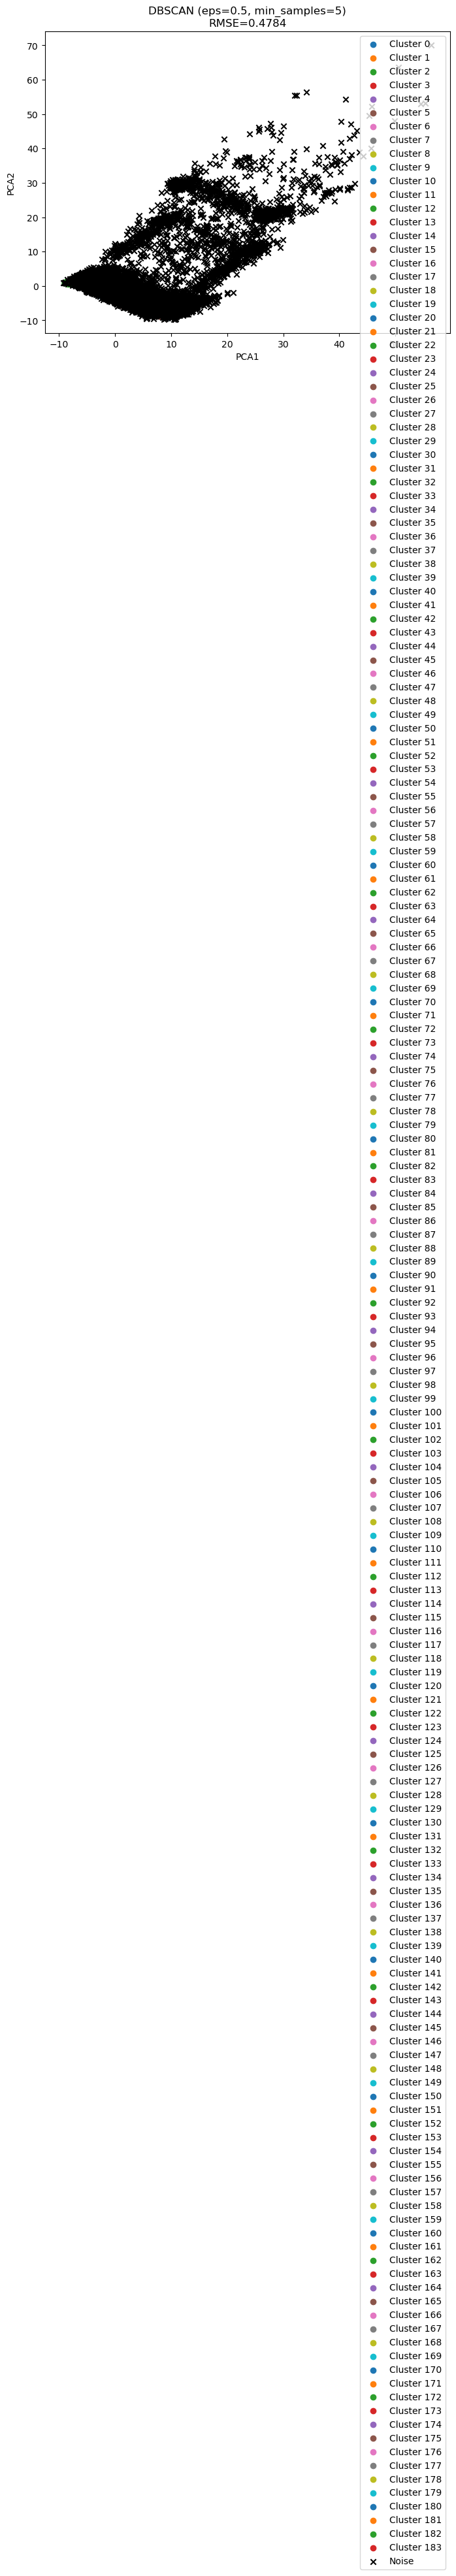

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np

# --- 1. Fit DBSCAN ---
db1 = DBSCAN(eps=0.5, min_samples=5)
labels_db = db1.fit_predict(X_cluster)

print("=== DBSCAN ===")
print("Clusters (including -1 for noise) :", set(labels_db))

# --- 2. Optional: silhouette score (ignore noise points) ---
mask = labels_db != -1  # ignore noise
if len(set(labels_db[mask])) > 1:  # silhouette needs ≥2 clusters
    sil_score = silhouette_score(X_cluster[mask], labels_db[mask])
    print("Silhouette score (non-noise) :", sil_score)
else:
    print("Silhouette score not defined (less than 2 clusters)")

# --- 3. Compute pseudo-RMSE (distance to cluster mean for each cluster) ---
rmse_list = []
unique_labels = set(labels_db)
unique_labels.discard(-1)  # ignore noise
for label in unique_labels:
    cluster_points = X_cluster[labels_db == label]
    center = cluster_points.mean(axis=0)
    mse = np.mean(np.sum((cluster_points - center)**2, axis=1))
    rmse_list.append(np.sqrt(mse))

if rmse_list:
    print("Pseudo RMSE per cluster :", rmse_list)
    print("Average pseudo RMSE :", np.mean(rmse_list))
else:
    print("No clusters to compute RMSE")


rmse_dbscan = np.mean(rmse_list)  # rmse_list calculé dans le code DBSCAN

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_cluster)

plt.figure(figsize=(8,6))

for label in set(labels_db):
    mask = labels_db == label
    if label == -1:
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c='k', marker='x', label='Noise')
    else:
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1], label=f'Cluster {label}')

plt.title(f"DBSCAN (eps=0.5, min_samples=5)\nRMSE={rmse_dbscan:.4f}")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

## Comparaison entre modèles

               Modèle      RMSE
9              DBSCAN  0.478368
5  LSTM Bidirectional  0.787343
4        LSTM Stacked  0.788655
3        LSTM Vanilla  0.791163
2                 RNN  0.800283
6                 MLP  0.811956
7                 CNN  0.863832
0  Persistence Median  0.986663
1              SARIMA  1.874220
8              KMeans  9.158339


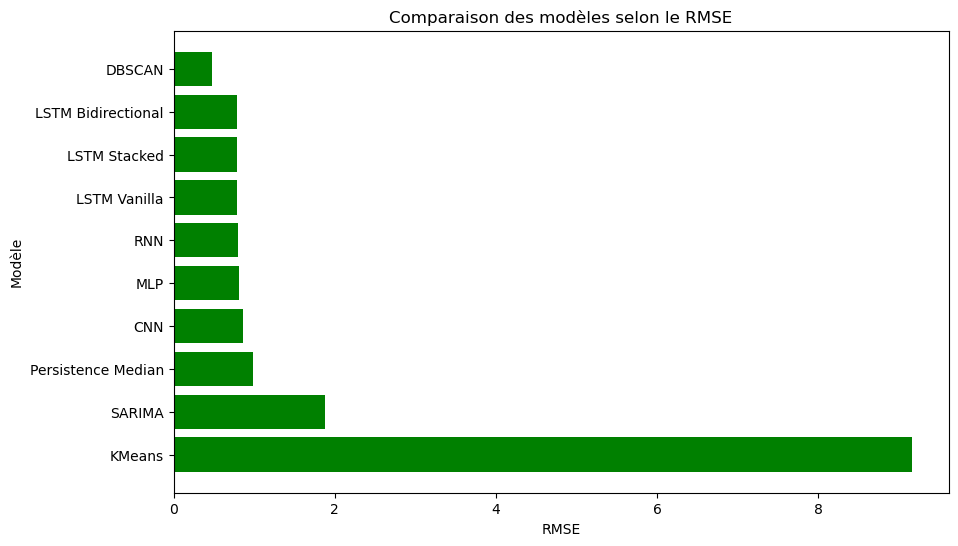

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

X_cluster = df1.drop(columns=["Global_active_power"])

# 2️⃣ KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X_cluster)

# RMSE KMeans (sqrt of inertia per sample)
rmse_kmeans = np.sqrt(kmeans.inertia_ / len(X_cluster))

# 3️⃣ DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
labels_db = db.fit_predict(X_cluster)

# Pseudo-RMSE DBSCAN
rmse_list_dbscan = []
unique_labels = set(labels_db)
unique_labels.discard(-1)  # ignore noise

for label in unique_labels:
    cluster_points = X_cluster[labels_db == label]
    center = cluster_points.mean(axis=0)
    mse = np.mean(np.sum((cluster_points - center) ** 2, axis=1))
    rmse_list_dbscan.append(np.sqrt(mse))

rmse_dbscan = np.mean(rmse_list_dbscan) if rmse_list_dbscan else np.nan

# 4️⃣ Regrouper tous les RMSE dans un dictionnaire
results = {
    'Persistence Median': rmse_median,
    'SARIMA': rmse_sarima,
    'RNN': rmse_rnn,
    'LSTM Vanilla': rmse_lstm,
    'LSTM Stacked': rmse_stacked,
    'LSTM Bidirectional': rmse_bilstm,
    'MLP': rmse_mlp,
    'CNN': rmse_cnn,
    'KMeans': rmse_kmeans,
    'DBSCAN': rmse_dbscan
}

# 5️⃣ Créer le DataFrame trié
results_df = pd.DataFrame(list(results.items()), columns=['Modèle', 'RMSE']).sort_values(by='RMSE')
print(results_df)

# 6️⃣ Tracer le graphique horizontal
plt.figure(figsize=(10,6))
plt.barh(results_df['Modèle'], results_df['RMSE'], color='green')
plt.title("Comparaison des modèles selon le RMSE")
plt.xlabel("RMSE")
plt.ylabel("Modèle")
plt.gca().invert_yaxis()  # Optionnel : meilleur RMSE en haut
plt.show()

## Sauvegarde les modéles utilisés